In [1]:
import os
import glob
import time

import pandas as pd
import numpy as np
import xarray as xr
import datetime
from netCDF4 import Dataset


import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import NullFormatter
matplotlib.rcParams.update({'font.size': 16})
%matplotlib inline
import cartopy.crs as ccrs
import cartopy

import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.append(p)

from orographicPrecipitation.precip_model_functions import qsat,upslope_omega_sin
from orographicPrecipitation.precip_extremes_scaling import *
from wrfProcessing import *

import warnings
from tabulate import tabulate

In [3]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore",FutureWarning)
    
    Mcont = WrfDataset100km("/global/cscratch1/sd/qnicolas/wrfdata/processed","new.wrf.aquaplanet.100km.400d"              ,"New Aquaplanet, control"         ,sel_tropicmountain,open_ds=1,shifttimes=0)
   # Mwarm = WrfDataset100km("/global/cscratch1/sd/qnicolas/wrfdata/processed","new.wrf.mountain.100km.SST2K_2XCO2.1000d"  ,"Mountain, SST +2K, 2*CO2"  ,sel_tropicmountain,open_ds=1,shifttimes=0)
    Acont = WrfDataset100km("/global/cscratch1/sd/qnicolas/wrfdata/processed","wrf.aquaplanet.100km.1000d"            ,"Old Aquaplanet, control"       ,sel_tropicmountain,open_ds=0)
   # Awarm = WrfDataset100km("/global/cscratch1/sd/qnicolas/wrfdata/processed","wrf.aquaplanet.100km.SST2K_2XCO2.1000d","Old Aquaplanet, SST +2K, 2*CO2",sel_tropicmountain,open_ds=0)

loading time : 1.3 s
Daily precips already computed
precips time : 0.0 s
loading time : 0.0 s
Daily precips already computed
precips time : 0.0 s


In [15]:
test_USGS=xr.open_mfdataset(sorted(glob.glob("/global/cscratch1/sd/qnicolas/WRF/WRFV4_USGS/test/em_beta_plane/wrfout_d01_1970-*")),combine="nested",concat_dim='Time')
rainc_USGS=(test_USGS.RAINC).diff('Time').mean("Time")*4
rainnc_USGS=(test_USGS.RAINNC).diff('Time').mean("Time")*4



In [16]:
test_noUSGS=xr.open_mfdataset(sorted(glob.glob("/global/cscratch1/sd/qnicolas/WRF/WRFV4_noUSGS/test/em_beta_plane/wrfout_d01_1970-*")),combine="nested",concat_dim='Time')
rainc_noUSGS=(test_noUSGS.RAINC).diff('Time').mean("Time")*4
rainnc_noUSGS=(test_noUSGS.RAINNC).diff('Time').mean("Time")*4

In [3]:
def set_pctile(pctile):
    for ds in [Mcont,Acont]:
        ds.set_extreme_precip(pctile/100)
        with warnings.catch_warnings():
            warnings.simplefilter("ignore",RuntimeWarning)
            warnings.simplefilter("ignore",FutureWarning)
            ds.set_extreme_vars(pctile/100)
            ds.compute_ogscaling()

In [4]:
pctile=99
set_pctile(pctile)

In [8]:
test=test_USGS.isel(Time=0)

In [29]:
print(1)

1


# Heat fluxes

In [35]:
np.array(test.MMINLU)

array('USGS', dtype='<U4')

In [13]:
print('MMINLU         : %s'%(test.MMINLU))
print("Albedo         : %.2f"%np.array(test.ALBEDO.mean()))
print("Sfc emissivity : %.2f"%np.array(test.EMISS.mean()))

MMINLU         : USGS
Albedo         : 0.08
Sfc emissivity : 0.98


In [14]:
print('MMINLU         : %s'%(test_noUSGS.isel(Time=0).MMINLU))
print("Albedo         : %.2f"%np.array(test_noUSGS.isel(Time=0).ALBEDO.mean()))
print("Sfc emissivity : %.2f"%np.array(test_noUSGS.isel(Time=0).EMISS.mean()))

MMINLU         : 
Albedo         : 0.20
Sfc emissivity : 0.85


In [41]:
i=-1
for v in test.variables:
    i+=1
    if i==0:
        continue
    print("{}  : {}".format(v,test[v].description))

XLAT  : LATITUDE, SOUTH IS NEGATIVE
XLONG  : LONGITUDE, WEST IS NEGATIVE
LU_INDEX  : LAND USE CATEGORY
ZNU  : eta values on half (mass) levels
ZNW  : eta values on full (w) levels
ZS  : DEPTHS OF CENTERS OF SOIL LAYERS
DZS  : THICKNESSES OF SOIL LAYERS
VAR_SSO  : variance of subgrid-scale orography
U  : x-wind component
V  : y-wind component
W  : z-wind component
PH  : perturbation geopotential
PHB  : base-state geopotential
T  : perturbation potential temperature theta-t0
THM  : either 1) pert moist pot temp=(1+Rv/Rd Qv)*(theta)-T0, or 2) pert dry pot temp=t
HFX_FORCE  : SCM ideal surface sensible heat flux
LH_FORCE  : SCM ideal surface latent heat flux
TSK_FORCE  : SCM ideal surface skin temperature
HFX_FORCE_TEND  : SCM ideal surface sensible heat flux tendency
LH_FORCE_TEND  : SCM ideal surface latent heat flux tendency
TSK_FORCE_TEND  : SCM ideal surface skin temperature tendency
MU  : perturbation dry air mass in column
MUB  : base state dry air mass in column
NEST_POS  : -
P  : 

In [27]:
test_USGS.HFX

<xarray.DataArray 'HFX' (Time: 361, south_north: 70, west_east: 80)>
dask.array<concatenate, shape=(361, 70, 80), dtype=float32, chunksize=(40, 70, 80), chunktype=numpy.ndarray>
Coordinates:
    XLAT     (Time, south_north, west_east) float32 dask.array<chunksize=(40, 70, 80), meta=np.ndarray>
    XLONG    (Time, south_north, west_east) float32 dask.array<chunksize=(40, 70, 80), meta=np.ndarray>
    XTIME    (Time) datetime64[ns] dask.array<chunksize=(40,), meta=np.ndarray>
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  UPWARD HEAT FLUX AT THE SURFACE
    units:        W m-2
    stagger:

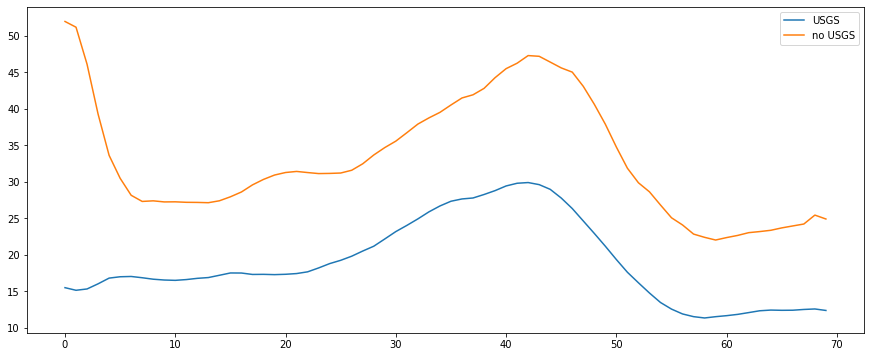

In [34]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

ax.plot(test_USGS.isel(Time=range(200,360)).mean(["west_east",'Time']).HFX,label="USGS")
ax.plot(test_noUSGS.isel(Time=range(200,360)).mean(["west_east",'Time']).HFX,label="no USGS")

None

ax.legend()


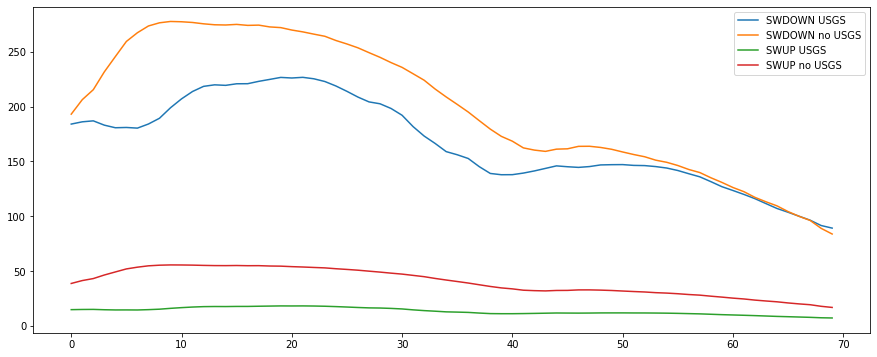

In [45]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

ax.plot(test_USGS.isel(Time=range(200,360)).mean(["west_east",'Time']).SWDNB,label="SWDOWN USGS")
ax.plot(test_noUSGS.isel(Time=range(200,360)).mean(["west_east",'Time']).SWDNB,label="SWDOWN no USGS")
ax.plot(test_USGS.isel(Time=range(200,360)).mean(["west_east",'Time']).SWUPB,label="SWUP USGS")
ax.plot(test_noUSGS.isel(Time=range(200,360)).mean(["west_east",'Time']).SWUPB,label="SWUP no USGS")

None

ax.legend()


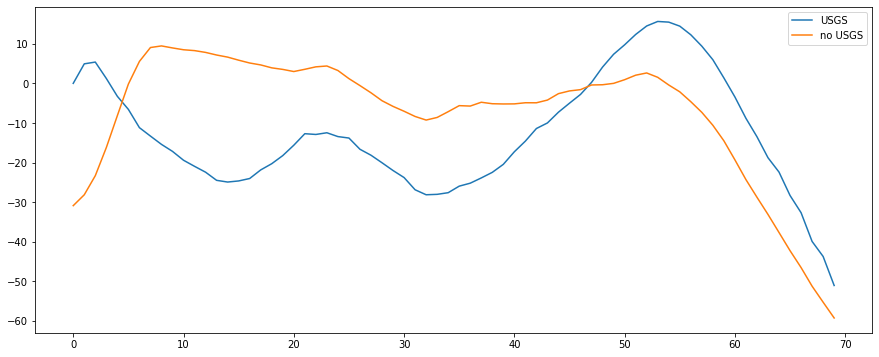

In [36]:
fig, ax = plt.subplots(1,1,figsize=(15,6))

ax.plot(test_USGS.mean(["west_east",'Time']).SWDNB+test_USGS.mean(["west_east",'Time']).LWDNB-test_USGS.mean(["west_east",'Time']).SWUPB-test_USGS.mean(["west_east",'Time']).LWUPB-test_USGS.mean(["west_east",'Time']).HFX-test_USGS.mean(["west_east",'Time']).LH,label="USGS")     # + down SW - up LW - up SW - hfx-LH
ax.plot(test_noUSGS.mean(["west_east",'Time']).SWDNB+test_noUSGS.mean(["west_east",'Time']).LWDNB-test_noUSGS.mean(["west_east",'Time']).SWUPB-test_noUSGS.mean(["west_east",'Time']).LWUPB-test_noUSGS.mean(["west_east",'Time']).HFX-test_noUSGS.mean(["west_east",'Time']).LH,label="no USGS")  # + down SW - up LW - up SW - hfx-LH

None

ax.legend()


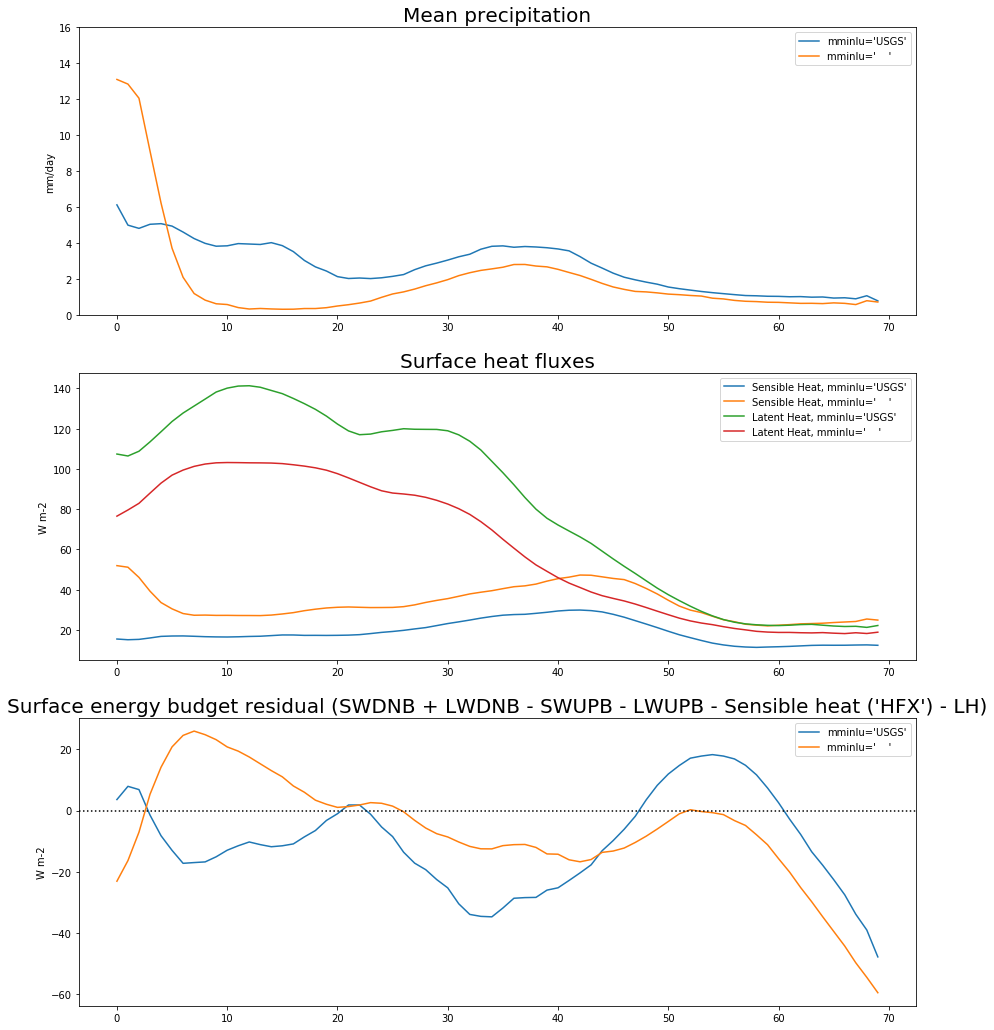

In [50]:
fig, ax = plt.subplots(3,1,figsize=(15,3*6))

t_USGS=test_USGS.isel(Time=range(200,360)).mean(["west_east",'Time'])
t_noUSGS=test_noUSGS.isel(Time=range(200,360)).mean(["west_east",'Time'])

ax[0].plot(rain_USGS.mean("west_east"),label="mminlu='USGS'")
ax[0].plot(rain_noUSGS.mean("west_east"),label="mminlu='    '")

ax[1].plot(t_USGS.HFX,label="Sensible Heat, mminlu='USGS'")
ax[1].plot(t_noUSGS.HFX,label="Sensible Heat, mminlu='    '")
ax[1].plot(t_USGS.LH,label="Latent Heat, mminlu='USGS'")
ax[1].plot(t_noUSGS.LH,label="Latent Heat, mminlu='    '")

ax[2].plot(t_USGS.SWDNB+t_USGS.LWDNB-t_USGS.SWUPB-t_USGS.LWUPB-t_USGS.HFX-t_USGS.LH,label="mminlu='USGS'")
ax[2].plot(t_noUSGS.SWDNB+t_noUSGS.LWDNB-t_noUSGS.SWUPB-t_noUSGS.LWUPB-t_noUSGS.HFX-t_noUSGS.LH,label="mminlu='    '")
ax[2].axhline(0.,color='k',linestyle=':')

ax[0].set_title("Mean precipitation",fontsize=20)
ax[1].set_title("Surface heat fluxes",fontsize=20)
ax[2].set_title("Surface energy budget residual (SWDNB + LWDNB - SWUPB - LWUPB - Sensible heat ('HFX') - LH)",fontsize=20)
ax[0].set_ylim(0,16)
ax[0].set_ylabel("mm/day")
ax[1].set_ylabel("W m-2")
ax[2].set_ylabel("W m-2")

for a in ax :a.legend()

# Zonal mean precip

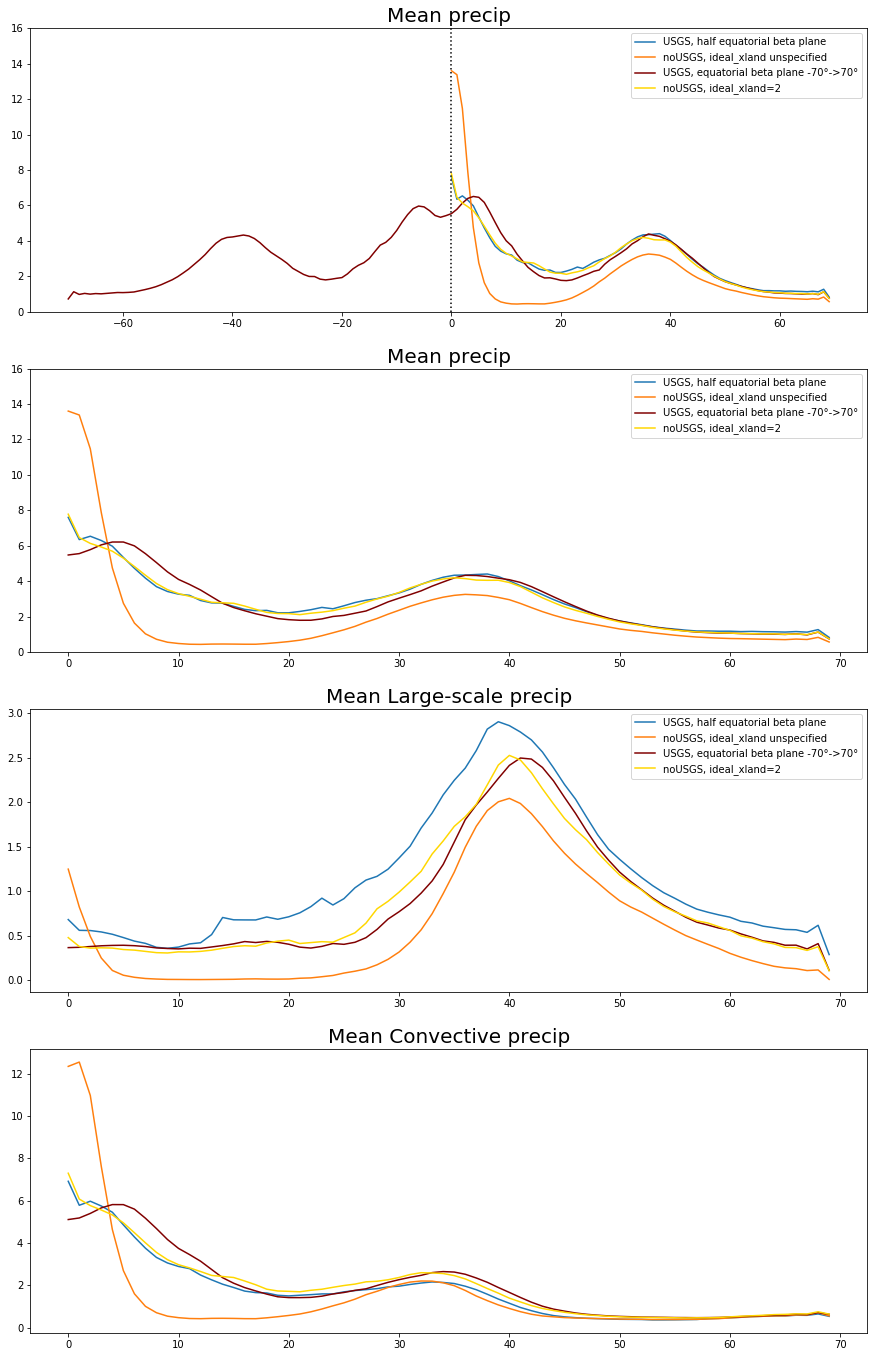

In [35]:
fig, ax = plt.subplots(4,1,figsize=(15,4*6))
props = plt.rcParams['axes.prop_cycle'].by_key()['color']
i=0
Mcont.lbl="USGS, half equatorial beta plane"
Acont.lbl="noUSGS, ideal_xland unspecified"
for ds in [Mcont,Acont]:
    ax[0].plot(ds.precip_daily.south_north,ds.precip_daily.mean(["time","west_east"]),  label="{:>30}".format(ds.lbl)  ,color=props[i])
    ax[1].plot(ds.precip_daily.south_north,ds.precip_daily.mean(["time","west_east"]),  label="{:>30}".format(ds.lbl)  ,color=props[i])
    ax[2].plot(ds.precip_daily.south_north,ds.precip_g_daily.mean(["time","west_east"]),label="{:>30}".format(ds.lbl),color=props[i])
    ax[3].plot(ds.precip_daily.south_north,ds.precip_c_daily.mean(["time","west_east"]),label="{:>30}".format(ds.lbl),color=props[i])
    i+=1

ax[0].plot(rainc_USGS.south_north-70,(rainc_USGS+rainnc_USGS).mean("west_east"),color="maroon",label="USGS, equatorial beta plane -70°->70°")
ax[0].plot(rainc_noUSGS.south_north,(rainc_noUSGS+rainnc_noUSGS).mean("west_east"),color="gold",label="noUSGS, ideal_xland=2")
ax[0].axvline(0.,color='k',linestyle=':')

rain_USGS_zonalmean=(rainc_USGS+rainnc_USGS).mean("west_east")
ax[1].plot(rainc_USGS.south_north[:70],(rain_USGS_zonalmean[70:]+rain_USGS_zonalmean[69::-1])/2,color="maroon",label="USGS, equatorial beta plane -70°->70°")
ax[1].plot(rainc_noUSGS.south_north,(rainc_noUSGS+rainnc_noUSGS).mean("west_east"),color="gold",label="noUSGS, ideal_xland=2")

rainc_USGS_zonalmean=rainc_USGS.mean("west_east")
rainnc_USGS_zonalmean=rainnc_USGS.mean("west_east")
ax[2].plot(rainc_USGS.south_north[:70],(rainnc_USGS_zonalmean[70:]+rainnc_USGS_zonalmean[69::-1])/2,color="maroon",label="USGS, equatorial beta plane -70°->70°")
ax[2].plot(rainc_noUSGS.south_north,rainnc_noUSGS.mean("west_east"),color="gold",label="noUSGS, ideal_xland=2")
ax[3].plot(rainc_USGS.south_north[:70],(rainc_USGS_zonalmean[70:]+rainc_USGS_zonalmean[69::-1])/2,color="maroon",label="USGS, equatorial beta plane -70°->70°")
ax[3].plot(rainc_noUSGS.south_north,rainc_noUSGS.mean("west_east"),color="gold",label="noUSGS, ideal_xland=2")


ax[0].set_title("Mean precip",fontsize=20)
ax[1].set_title("Mean precip",fontsize=20)
ax[2].set_title("Mean Large-scale precip",fontsize=20)
ax[3].set_title("Mean Convective precip",fontsize=20)
ax[0].set_ylim(0,16)
ax[1].set_ylim(0,16)

for a in ax[:-1] :a.legend()

# Precipitation extremes

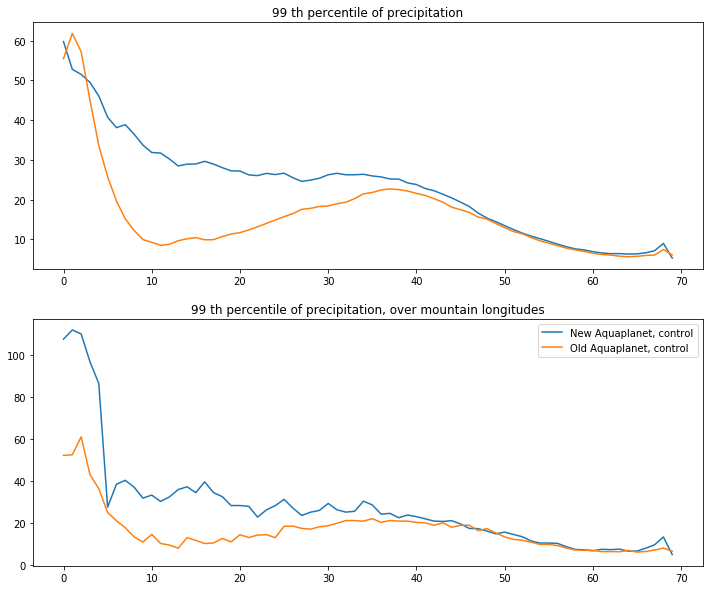

In [6]:
fig, ax = plt.subplots(2,1,figsize=(12,10))

for ds in [Mcont,Acont]:
    ax[0].plot(ds.ex_pr.south_north,ds.ex_pr_zonmean,label=ds.lbl)
    ax[0].set_title("%i th percentile of precipitation"%pctile)
    ax[1].plot(ds.ex_pr.south_north,ds.ex_pr.sel(west_east=slice(38,40)).mean("west_east"),label=ds.lbl)
    ax[1].set_title("%i th percentile of precipitation, over mountain longitudes"%pctile)
plt.legend()

## Vertical motion profiles over tropics/mountains on precip extremes days

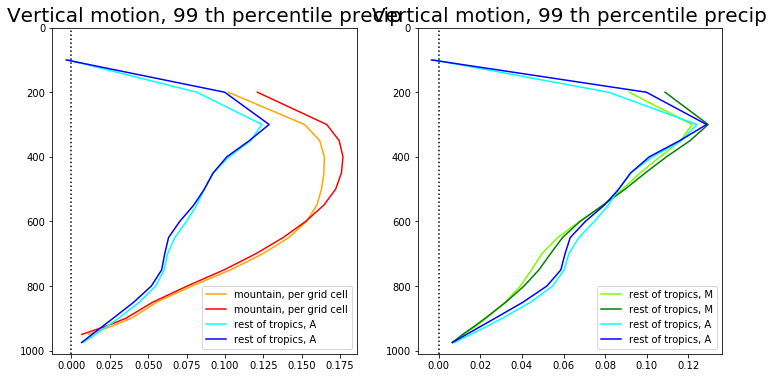

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))


with warnings.catch_warnings():
    warnings.simplefilter("ignore",category=RuntimeWarning)
    ax=ax1
    ax.plot(Mcont.ex_w.isel(south_north=range(5),west_east=range(38,40)).mean(["south_north","west_east"]),Mcont.ex_w.level,label="mountain, per grid cell",color="orange")
    ax.plot(Mwarm.ex_w.isel(south_north=range(5),west_east=range(38,40)).mean(["south_north","west_east"]),Mwarm.ex_w.level,label="mountain, per grid cell",color="red")

    ax.plot(Acont.ex_w.isel(south_north=range(5)).mean(["south_north","west_east"]),Acont.ex_w.level,label="rest of tropics, A",color="cyan")
    ax.plot(Awarm.ex_w.isel(south_north=range(5)).mean(["south_north","west_east"]),Awarm.ex_w.level,label="rest of tropics, A",color="blue")

    ax=ax2
    ax.plot(Mcont.ex_w.isel(south_north=range(5)).sel(west_east=((Mcont.ex_w.west_east<20)|(Mcont.ex_w.west_east>60))).mean(["south_north","west_east"]),Mcont.ex_w.level,label="rest of tropics, M",color="lawngreen")
    ax.plot(Mwarm.ex_w.isel(south_north=range(5)).sel(west_east=((Mwarm.ex_w.west_east<20)|(Mwarm.ex_w.west_east>60))).mean(["south_north","west_east"]),Mwarm.ex_w.level,label="rest of tropics, M",color="green")
    
    ax.plot(Acont.ex_w.isel(south_north=range(5)).mean(["south_north","west_east"]),Acont.ex_w.level,label="rest of tropics, A",color="cyan")
    ax.plot(Awarm.ex_w.isel(south_north=range(5)).mean(["south_north","west_east"]),Awarm.ex_w.level,label="rest of tropics, A",color="blue")

    
for ax in (ax1,ax2):
    ax.axvline(0,linestyle=':',color='k')
    ax.set_title("Vertical motion, %i th percentile precip"%pctile,fontsize=20)
    ax.legend(loc='lower right')
    ax.set_ylim(1010,0)
    



## Extreme precipitation sensitivity

Text(0.5, 0.98, 'Sensitivity of the 99 th pctile of precip, %/(K of global mean temperature)')

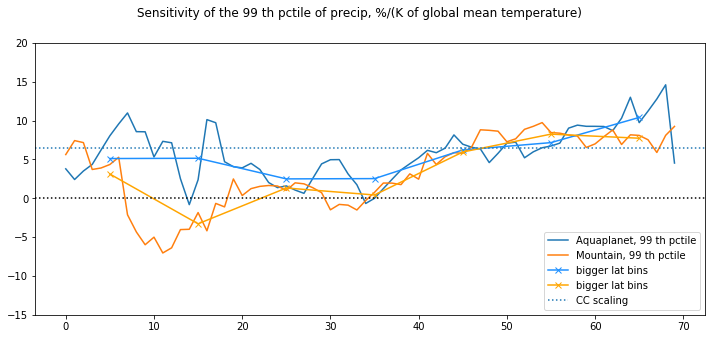

In [10]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.plot(Acont.ex_pr.south_north,100*(Awarm.ex_pr_zonmean-Acont.ex_pr_zonmean)/Acont.ex_pr_zonmean/2, label = "Aquaplanet, %i th pctile"%pctile)
ax.plot(Mcont.ex_pr.south_north,100*(Mwarm.ex_pr_zonmean-Mcont.ex_pr_zonmean)/Mcont.ex_pr_zonmean/2, label = "Mountain, %i th pctile"%pctile)


with warnings.catch_warnings():
    warnings.simplefilter("ignore",category=FutureWarning)       
    resample_factor=10
    resampled_pr95_Mwarm = Mwarm.ex_pr.groupby(((Mwarm.ex_pr.south_north//resample_factor)+0.5) * resample_factor).mean('south_north').mean("west_east")
    resampled_pr95_Mcont = Mcont.ex_pr.groupby(((Mcont.ex_pr.south_north//resample_factor)+0.5) * resample_factor).mean('south_north').mean("west_east")
    resampled_pr95_Awarm = Awarm.ex_pr.groupby(((Awarm.ex_pr.south_north//resample_factor)+0.5) * resample_factor).mean('south_north').mean("west_east")
    resampled_pr95_Acont = Acont.ex_pr.groupby(((Acont.ex_pr.south_north//resample_factor)+0.5) * resample_factor).mean('south_north').mean("west_east")

ax.plot(resampled_pr95_Awarm.south_north,100*(resampled_pr95_Awarm-resampled_pr95_Acont)/resampled_pr95_Acont/2.,'-x',color='dodgerblue',label="bigger lat bins")
ax.plot(resampled_pr95_Mwarm.south_north,100*(resampled_pr95_Mwarm-resampled_pr95_Mcont)/resampled_pr95_Mcont/2.,'-x',color='orange',label="bigger lat bins")

ax.axhline(6.5,linestyle=":",label="CC scaling")
ax.axhline(0.,linestyle=":",color="k")

ax.set_ylim(-15,20)

plt.legend()
fig.suptitle("Sensitivity of the %i th pctile of precip, %%/(K of global mean temperature)"%pctile)

## Sensitivity breakdown (Fildier et al 2017)

In [11]:
tropics_limit=5

def mean_mountain(x):
    return x.isel(south_north=range(5),west_east=range(38,40)).mean(['west_east','south_north'])
def mean_lee(x):
    return x.isel(south_north=range(5),west_east=range(40,42)).mean(['west_east','south_north'])
def mean_rest_tropics(x):
    return x.isel(south_north=range(tropics_limit)).sel(west_east=((x.west_east<20)|(x.west_east>60))).mean(['west_east','south_north'])

def mean_tropics(x):
    return x.isel(south_north=range(tropics_limit)).mean(['west_east','south_north'])
def mean_midlatitudes(x):
    return x.isel(south_north=range(40,60)).mean(['west_east','south_north'])

In [19]:
def bsensitivity_breakdown(cont,warm,pctile,mean_tropics,mean_midlatitudes,mean_mountain,mean_lee,mountain=1):
    meanTinc=2
    with warnings.catch_warnings():
        warnings.simplefilter("ignore",category=RuntimeWarning)
                      
        prsensm  = bPR(cont,warm,meanTinc,mean_mountain    )
        prsensl  = bPR(cont,warm,meanTinc,mean_lee         )
        prsenst  = bPR(cont,warm,meanTinc,mean_tropics     )
        prsense  = bPR(cont,warm,meanTinc,mean_midlatitudes)
        
        em  = bE(cont,warm,meanTinc,mean_mountain    )
        el  = bE(cont,warm,meanTinc,mean_lee         )
        et  = bE(cont,warm,meanTinc,mean_tropics     )
        ee  = bE(cont,warm,meanTinc,mean_midlatitudes)
        
        d1m  = bD1(cont,warm,meanTinc,mean_mountain    )
        d1l  = bD1(cont,warm,meanTinc,mean_lee         )
        d1t  = bD1(cont,warm,meanTinc,mean_tropics     )
        d1e  = bD1(cont,warm,meanTinc,mean_midlatitudes)
        
        d2m  = bD2(cont,warm,meanTinc,mean_mountain    )
        d2l  = bD2(cont,warm,meanTinc,mean_lee         )
        d2t  = bD2(cont,warm,meanTinc,mean_tropics     )
        d2e  = bD2(cont,warm,meanTinc,mean_midlatitudes)
        
        thm  = bT(cont,warm,meanTinc,mean_mountain    )
        thl  = bT(cont,warm,meanTinc,mean_lee         )
        tht  = bT(cont,warm,meanTinc,mean_tropics     )
        the  = bT(cont,warm,meanTinc,mean_midlatitudes)
        
    print(' '*30+'\033[1m'+ "Extreme precip sensitivity breakdown, %i th percentile"%pctile + '\033[0m')
    
    tab=[['Tropics - 0°-%i°'%tropics_limit ,"%.2f"%(100*prsenst),"%.2f"%(100*et),"%.2f"%(100*d1t),"%.2f"%(100*d2t),"%.2f"%(100*tht),"%.2f"%(100*(prsenst-et-d1t-d2t-tht))],
         ['Midlatitudes - 40°-60°',         "%.2f"%(100*prsense),"%.2f"%(100*ee),"%.2f"%(100*d1e),"%.2f"%(100*d2e),"%.2f"%(100*the),"%.2f"%(100*(prsense-ee-d1e-d2e-the))],
        ]
    if mountain :
        tab += [['Mountain - Western slope',"%.2f"%(100*prsensm),"%.2f"%(100*em),"%.2f"%(100*d1m),"%.2f"%(100*d2m),"%.2f"%(100*thm),"%.2f"%(100*(prsensm-em-d1m-d2m-thm))],
                ['Mountain - Eastern slope',           "%.2f"%(100*prsensl),"%.2f"%(100*el),"%.2f"%(100*d1l),"%.2f"%(100*d2l),"%.2f"%(100*thl),"%.2f"%(100*(prsensl-el-d1l-d2l-thl))],
               ]
    
    print(tabulate(tab, headers=['Region', 'Precip (%)', 'Efficiency (%)', 'D1 (%)', 'D2 (%)', 'T (%)', 'N (%)']))


In [21]:
pctile=99
set_pctile(pctile)
print("Tropics Mountain")
t=time.time()
bsensitivity_breakdown(Mcont,Mwarm,pctile,mean_rest_tropics,mean_midlatitudes,mean_mountain,mean_lee,mountain=1)
print(time.time()-t)
print("Aquaplanet")
t=time.time()
bsensitivity_breakdown(Acont,Awarm,pctile,mean_tropics,mean_midlatitudes,mean_mountain,mean_lee,mountain=0)
print(time.time()-t)

Tropics Mountain
                              Extreme precip sensitivity breakdown, 99 th percentile
Region                      Precip (%)    Efficiency (%)    D1 (%)    D2 (%)    T (%)    N (%)
------------------------  ------------  ----------------  --------  --------  -------  -------
Tropics - 0°-5°                   7.76             -0.7       2.92     -0.75     7.6     -1.3
Midlatitudes - 40°-60°            6.74              0.61      1.6      -0.46     5.74    -0.74
Mountain - Western slope          7.17              1.04      2.27     -0.97     6.26    -1.44
Mountain - Eastern slope          2.83              0.12     -0.55     -0.72     5.89    -1.91
123.29496645927429
Aquaplanet
                              Extreme precip sensitivity breakdown, 99 th percentile
Region                    Precip (%)    Efficiency (%)    D1 (%)    D2 (%)    T (%)    N (%)
----------------------  ------------  ----------------  --------  --------  -------  -------
Tropics - 0°-5°             

In [22]:
pctile=95
set_pctile(pctile)
print("Tropics Mountain")
t=time.time()
bsensitivity_breakdown(Mcont,Mwarm,pctile,mean_rest_tropics,mean_midlatitudes,mean_mountain,mean_lee,mountain=1)
print(time.time()-t)
print("Aquaplanet")
t=time.time()
bsensitivity_breakdown(Acont,Awarm,pctile,mean_tropics,mean_midlatitudes,mean_mountain,mean_lee,mountain=0)
print(time.time()-t)

Tropics Mountain
                              Extreme precip sensitivity breakdown, 95 th percentile
Region                      Precip (%)    Efficiency (%)    D1 (%)    D2 (%)    T (%)    N (%)
------------------------  ------------  ----------------  --------  --------  -------  -------
Tropics - 0°-5°                   8.53              0.17      3.35     -1.15     7.59    -1.44
Midlatitudes - 40°-60°            6.57              0.35      1.5      -0.58     6.21    -0.91
Mountain - Western slope          4.03             -2.35      1.28     -0.88     6.81    -0.82
Mountain - Eastern slope          3.02              1.91     -3.56     -0.6      6.76    -1.48
123.80254864692688
Aquaplanet
                              Extreme precip sensitivity breakdown, 95 th percentile
Region                    Precip (%)    Efficiency (%)    D1 (%)    D2 (%)    T (%)    N (%)
----------------------  ------------  ----------------  --------  --------  -------  -------
Tropics - 0°-5°            